In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('C:/Users/Skyler/Desktop/projects/Heart_Disease_Prediction.csv')

In [4]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [6]:
df['Heart Disease'] = df['Heart Disease'].replace({'Presence': '1', 'Absence': '0'})

In [7]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


In [8]:
df['Heart Disease'] = df['Heart Disease'].astype('int64')

In [9]:
df['Heart Disease'].value_counts()


0    150
1    120
Name: Heart Disease, dtype: int64

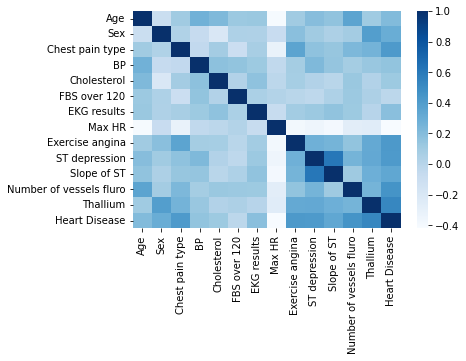

In [10]:
sns.heatmap(df.corr(), cmap='Blues')
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    int64  
dtypes: float64(1), int64(13)
m

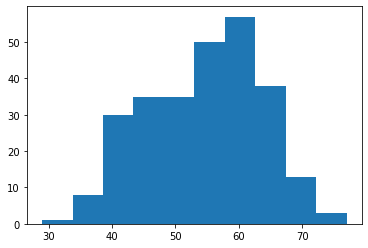

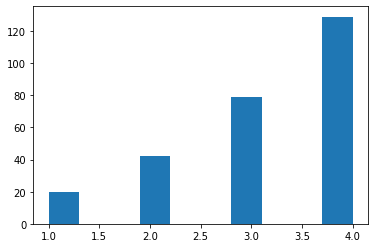

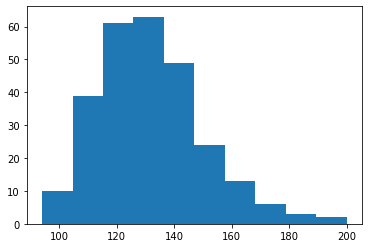

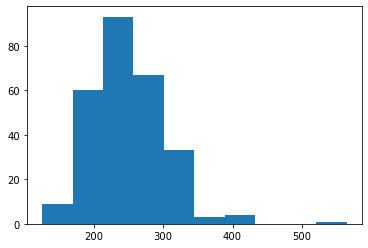

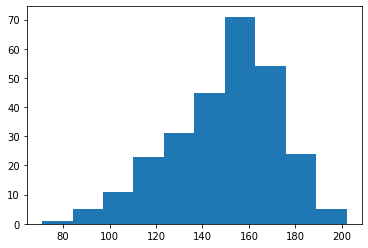

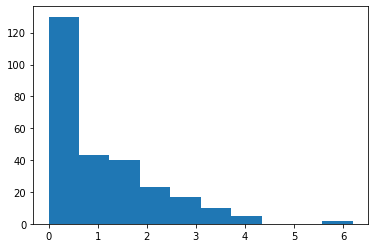

In [12]:
plt.hist(df.Age)
plt.show()
plt.hist(df.iloc[:, 2])
plt.show()
plt.hist(df.iloc[:, 3])
plt.show()
plt.hist(df.iloc[:, 4])
plt.show()
plt.hist(df.iloc[:, 7])
plt.show()
plt.hist(df.iloc[:, 9])
plt.show()

In [13]:
x = df.drop('Heart Disease', axis=1)
y = df['Heart Disease']
scaler = StandardScaler().fit_transform(x)

In [79]:
accuracy = []

for i in range(1, 1000):
  x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = .3, random_state = i)
  lr = LogisticRegression( max_iter = 10000).fit(x_train, y_train)
  y_pred = lr.predict(x_test)
  accuracy.append(accuracy_score(y_test, y_pred))

In [ ]:
from sklearn.model_selection import GridSearchCV
import numpy as np
max(accuracy)
np.max(accuracy)
accuracy.index(0.9382716049382716)

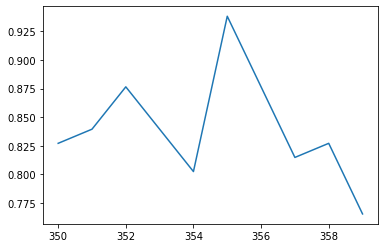

In [65]:
plt.plot(range(350, 360), accuracy[350:360])

In [73]:

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = .3, random_state = 356)
lr = LogisticRegression(max_iter = 10000).fit(x_train, y_train)
y_pred = lr.predict(x_test)

print(accuracy_score(y_test, y_pred))
params = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
grid = GridSearchCV(lr, param_grid = params, scoring ='accuracy')
grid.fit(x_train, y_train)
grid_pred = grid.predict(x_test)

0.9382716049382716


In [77]:
from sklearn.metrics import confusion_matrix
grid_r = classification_report(y_test, grid_pred)
grid.best_estimator_.get_params()
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94        42
           1       0.97      0.90      0.93        39

    accuracy                           0.94        81
   macro avg       0.94      0.94      0.94        81
weighted avg       0.94      0.94      0.94        81

[[41  1]
 [ 4 35]]
